<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Predict_(WAGES)_IN_%E2%80%9CCurrent_Population_Survey%E2%80%9D_using_Linear_(ML)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICT WAGES IN "CURRENT POPULATION SUREY FROM 1985"

1. The dataset: wages
2. The machine-learning pipeline
3. Processing the dataset
4. Interpreting coefficients: scale matters
5. Interpreting coefficients: being cautious about causality
6. Checking the variability of the coefficients
7. The problem of correlated variables
8. Preprocessing numerical variables
9. Linear models with regularization
10. Linear models with sparse coefficients
11. Wrong causal interpretation

IMPORT LIBRARIES

In [ ]:
import numpy as np
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Wages

We `fetch the data from OpenML`. setting the parameter `as_frame` to `True` will retrieve the data as a pandas dataframe.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/csv_result-cps_85_wages.csv')
df

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR,WAGE
0,1,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married,5.10
1,2,9,no,female,42,not_member,57,White,Other,Manufacturing,Married,4.95
2,3,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried,6.67
3,4,12,no,male,4,not_member,22,White,Other,Other,Unmarried,4.00
4,5,12,no,male,17,not_member,35,White,Other,Other,Married,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,18,no,male,5,not_member,29,White,Professional,Other,Unmarried,11.36
530,531,12,no,female,33,not_member,51,Other,Professional,Other,Married,6.10
531,532,17,no,female,25,member,48,Other,Professional,Other,Married,23.25
532,533,12,yes,male,13,member,31,White,Professional,Other,Married,19.88


In [ ]:
df.nunique()

,0
EDUCATION,17
SOUTH,2
SEX,2
EXPERIENCE,52
UNION,2
AGE,47
RACE,3
OCCUPATION,6
SECTOR,3
MARR,2


In [ ]:
df.columns

Index(['id', 'EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'AGE', 'RACE',
       'OCCUPATION', 'SECTOR', 'MARR', 'WAGE'],
      dtype='object')

In [ ]:
input_cols =list(df.columns)[0:-1]
target_col = 'WAGE'
input_cols

['id',
 'EDUCATION',
 'SOUTH',
 'SEX',
 'EXPERIENCE',
 'UNION',
 'AGE',
 'RACE',
 'OCCUPATION',
 'SECTOR',
 'MARR']

In [ ]:
inputs = df[input_cols].copy()
target = df[target_col].copy()

In [ ]:
inputs

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,1,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,2,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,3,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,4,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,5,12,no,male,17,not_member,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,530,18,no,male,5,not_member,29,White,Professional,Other,Unmarried
530,531,12,no,female,33,not_member,51,Other,Professional,Other,Married
531,532,17,no,female,25,member,48,Other,Professional,Other,Married
532,533,12,yes,male,13,member,31,White,Professional,Other,Married


In [ ]:
target

,WAGE
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50
...,...
529,11.36
530,6.10
531,23.25
532,19.88


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(inputs, target , random_state=42)

In [ ]:
X_train

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
204,205,16,no,female,6,not_member,28,White,Management,Manufacturing,Married
196,197,16,no,female,26,not_member,48,White,Management,Other,Married
510,511,17,no,female,14,not_member,37,White,Professional,Other,Married
19,20,12,no,male,33,not_member,51,White,Other,Other,Married
361,362,16,no,male,21,not_member,43,White,Service,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
71,72,14,no,male,20,member,40,White,Other,Other,Married
106,107,14,no,male,21,member,41,White,Other,Other,Married
270,271,12,no,female,38,not_member,56,White,Clerical,Other,Married
435,436,18,no,male,8,not_member,32,White,Professional,Other,Married


In [ ]:
X_test

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
222,223,12,no,female,45,not_member,63,White,Sales,Other,Married
131,132,12,no,male,3,not_member,21,White,Other,Manufacturing,Unmarried
149,150,13,yes,male,7,not_member,26,White,Other,Manufacturing,Married
244,245,12,no,male,20,not_member,38,White,Sales,Other,Married
84,85,13,no,male,8,member,27,Other,Other,Manufacturing,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
154,155,12,yes,male,1,not_member,19,White,Other,Other,Unmarried
155,156,12,no,male,13,not_member,31,White,Other,Manufacturing,Married
353,354,10,yes,female,38,not_member,54,Other,Service,Other,Married
407,408,10,yes,female,33,not_member,49,White,Service,Other,Unmarried


In [ ]:
Y_train

,WAGE
204,10.62
196,9.37
510,9.50
19,20.55
361,4.50
...,...
71,16.00
106,26.00
270,9.65
435,22.20


In [ ]:
Y_test

,WAGE
222,6.40
131,5.50
149,6.00
244,5.50
84,9.00
...,...
154,6.25
155,8.50
353,13.10
407,3.50


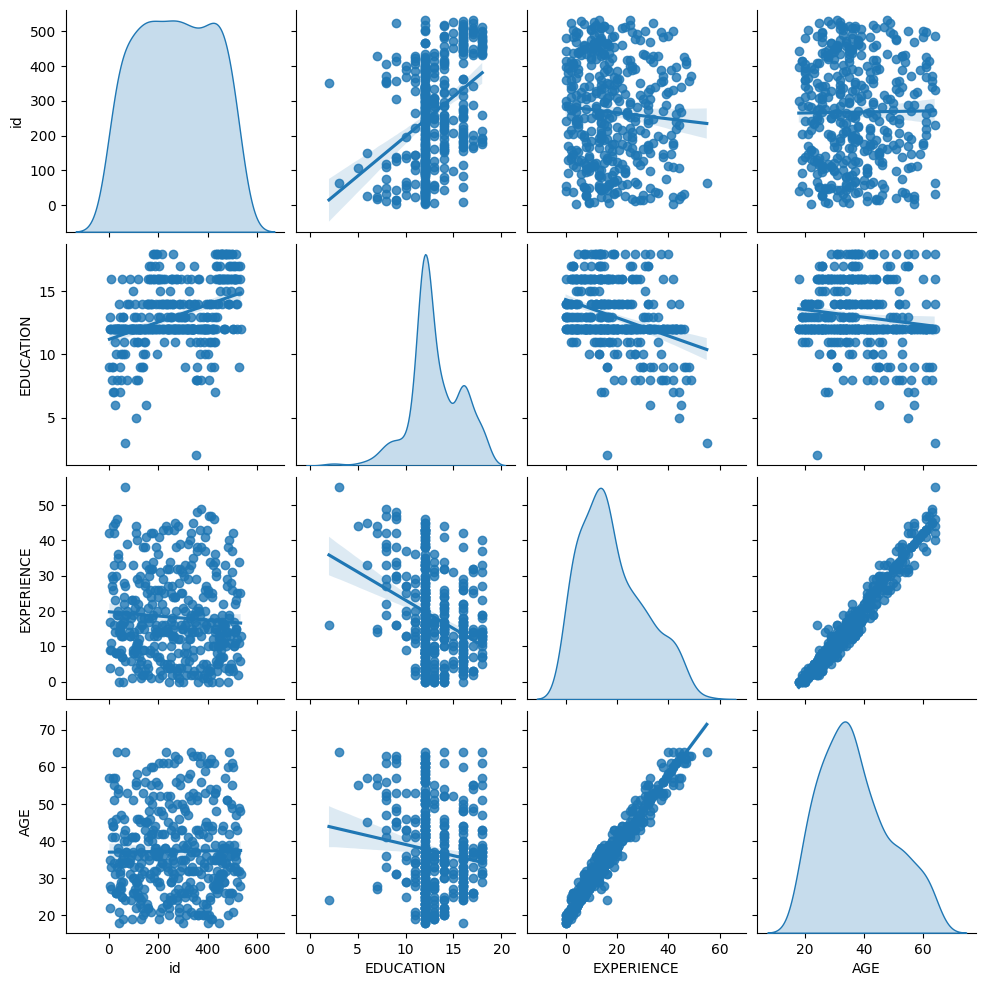

In [ ]:
train_dataset = X_train.copy()
_ = sns.pairplot(train_dataset , kind = 'reg',diag_kind = 'kde' )

 dependence between `WAGE and EDUCATION` represented here is a marginal dependence , the `EXPERIENCE and AGE` are strongly linearly correlated

In [ ]:
df['SOUTH'].value_counts()

,count
SOUTH,
no,378
yes,156


In [ ]:
df['RACE'].value_counts()

,count
RACE,
White,440
Other,67
Hispanic,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          534 non-null    int64  
 1   EDUCATION   534 non-null    int64  
 2   SOUTH       534 non-null    object 
 3   SEX         534 non-null    object 
 4   EXPERIENCE  534 non-null    int64  
 5   UNION       534 non-null    object 
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    object 
 8   OCCUPATION  534 non-null    object 
 9   SECTOR      534 non-null    object 
 10  MARR        534 non-null    object 
 11  WAGE        534 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 50.2+ KB


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols =['RACE','SOUTH','SEX','UNION','OCCUPATION','SECTOR','MARR']
numeric_cols = ['EDUCATION', 'EXPERIENCE','AGE']

preprocesor = make_column_transformer((OneHotEncoder(drop='if_binary'),categorical_cols),remainder='passthrough',verbose_feature_names_out=False,)
preprocesor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['RACE', 'SOUTH', 'SEX', 'UNION', 'OCCUPATION',
                                  'SECTOR', 'MARR'])],
                  verbose_feature_names_out=False)

In order to `describe the dataset` as a linear model we `use a ridge regressor` with a very small regularization and to model the logarithm of the WAGE.

In [ ]:
import scipy as sp
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    preprocesor,
    TransformedTargetRegressor(regressor=Ridge(alpha=1e-10),func = np.log10,inverse_func=sp.special.exp10 ),
)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'SOUTH', 'SEX',
                                                   'UNION', 'OCCUPATION',
                                                   'SECTOR', 'MARR'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

# Processing Data

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06576e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'SOUTH', 'SEX',
                                                   'UNION', 'OCCUPATION',
                                                   'SECTOR', 'MARR'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In order to `check the performance` of the computed model `plotting its predictions` on the test set and computing, `for example, the median absolute error of the model.`

In [ ]:
from sklearn.metrics import PredictionErrorDisplay , median_absolute_error

In [ ]:
mae_train =median_absolute_error(Y_train,model.predict(X_train))
Y_pred = model.predict(X_test)
mae_test = median_absolute_error(Y_test, Y_pred)
scores = {
    "Median absolute Error on Train Set" : f"{mae_train:.3f} $/Hour",
    "Median Absolute Error on Test Set" : f"{mae_test:.2f} $/Hour",
}
print("Y predictions: ",Y_pred)
scores

Y predictions:  [ 7.6176591   6.9781354   7.60111878  7.35604239  9.54017236  7.40881919
  6.49384902  7.12655467 10.09603263  6.23023872  7.00203316 10.71018952
  6.55141258  9.34319308  4.68987284  6.82532201 14.25544368  7.6793833
  9.66867386  4.44064734 10.05496333  7.89003978  6.04801088  4.87490545
  7.06443099 12.6548937  11.45815293 12.84210484  7.72124631  7.1997076
  8.39807528  5.86067033  8.69348262 13.39499873 15.33042656  4.94604637
 10.60742544  9.43374707  9.34510494 11.8174533  12.06606219  8.91836107
  7.60241122 12.53683951  7.87835131  5.99195391  6.59229098  6.60803423
  7.2808999   5.47577112  8.53374088  6.95258799  8.52779654  6.42683694
  6.67480503  5.76822686  6.20569082  6.6324364   8.29912246  4.47584759
  4.87343621  6.9458621   6.89017225 10.4407511   4.69046727  5.48517264
  6.98979046  5.68377505  8.77460333  5.42315958 13.13156403  8.26439031
  8.64235057  6.96076708  6.12563034  9.83662553 10.82361762  5.04287823
  4.69434652  6.01087671  9.96325636 

{'Median absolute Error on Train Set': '2.154 $/Hour',
 'Median Absolute Error on Test Set': '2.14 $/Hour'}

# graph visualization

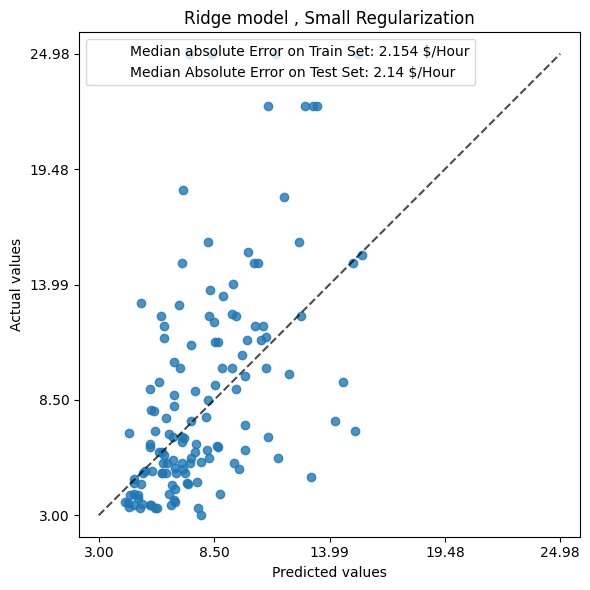

In [ ]:
_ , ax = plt.subplots(figsize=(6,6))
display = PredictionErrorDisplay.from_predictions(
    Y_test , Y_pred , kind = 'actual_vs_predicted',ax=ax , scatter_kwargs={'alpha': 0.8}
)
ax.set_title('Ridge model , Small Regularization')
for name , score in scores.items():
  ax.plot([],[]," ",label=f"{name}: {score}")

ax.legend(loc='upper left')
plt.tight_layout()

`Statement ` : good predictions should lie on the black dashed line.

# Interpreting coefficients: scale matters

 take a look to the values of the coefficients of the regressor

In [ ]:
feature_names = model[:-1].get_feature_names_out()
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,columns = ['Coefficients'] , index = feature_names,
)
coefs

,Coefficients
RACE_Hispanic,-0.013063
RACE_Other,-0.009450
RACE_White,0.022415
SOUTH_yes,-0.033440
SEX_male,0.090226
UNION_not_member,-0.118299
OCCUPATION_Clerical,0.002143
OCCUPATION_Management,0.080962
OCCUPATION_Other,-0.046034
OCCUPATION_Professional,0.093083


The `AGE coefficient` is expressed in `“dollars/hour per living years”` while the `EDUCATION` one is expressed in `“dollars/hour per years of education”`

Barplot

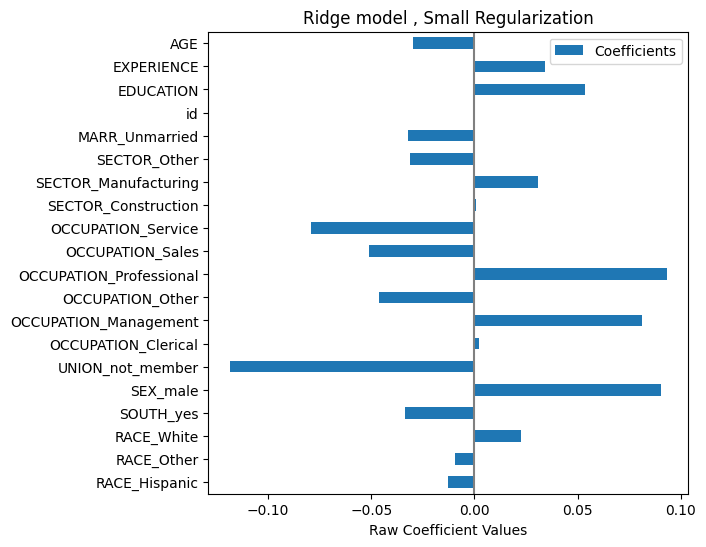

In [ ]:
coefs.plot.barh(figsize=(8, 6))
plt.title("Ridge model , Small Regularization")
plt.axvline(x=0 , color = '.5')
plt.xlabel('Raw Coefficient Values')
plt.subplots_adjust(left=0.3)

1. Looking at the coefficient plot to gauge feature importance can be misleading as some of them vary on a small scale, while others, like AGE, varies a lot more, several decades.
2. This is visible if we compare the standard deviations of different features

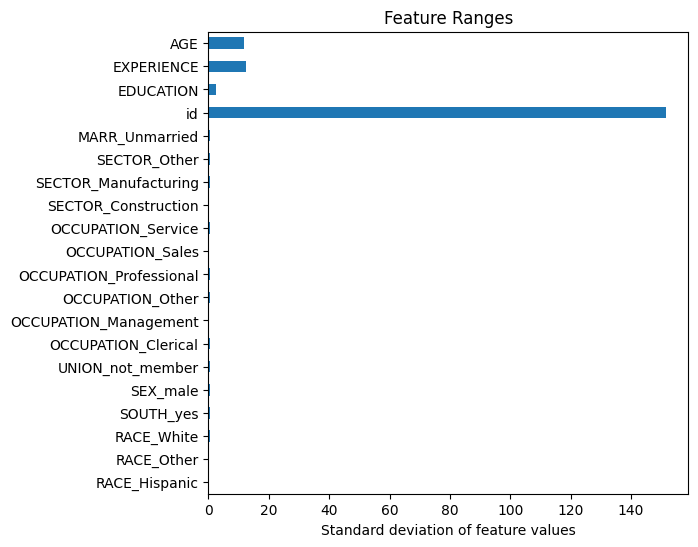

In [ ]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(8,6))
plt.title('Feature Ranges')
plt.xlabel("Standard deviation of feature values")
plt.subplots_adjust(left=0.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measures.

we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

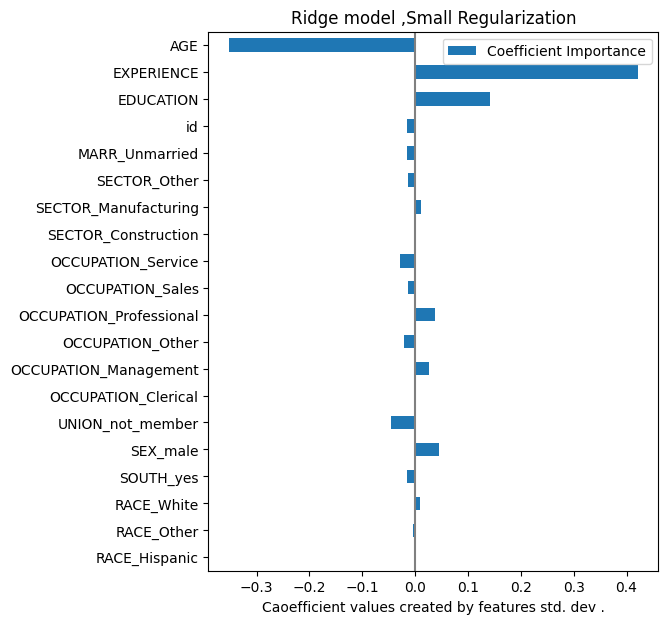

In [ ]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0), columns=['Coefficient Importance'], index =feature_names,
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.xlabel("Caoefficient values created by features std. dev .")
plt.title('Ridge model ,Small Regularization')
plt.axvline(x=0 ,color='.5')
plt.subplots_adjust(left=0.4)

# Interpreting coefficients: being cautious about causality

Linear models are a great tool for measuring statistical association, but we should be cautious when making statements about causality, after all correlation doesn’t always imply causation. This is particularly difficult in the social sciences because the variables we observe only function as proxies for the underlying causal process.

 The usefulness of these measures could end up being overstated, especially if the degree of confounding is strong. Our model predicts `0.054699` a
 increase in hourly wage for each year of education. The actual causal effect might be lower because of this confounding.

# Checking the variability of the coefficients

We can check the coefficient variability through cross-validation: it is a form of data perturbation (related to resampling).

In [ ]:
from sklearn.model_selection import RepeatedKFold , cross_validate

In [ ]:
cv = RepeatedKFold(n_splits = 5,n_repeats=5 ,random_state=0)
cv_model = cross_validate(
    model , inputs , target , cv = cv , return_estimator=True , n_jobs = 2,
)
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(inputs.iloc[train_idx]).std(axis=0)
        for est , (train_idx,_ ) in zip(cv_model["estimator"], cv.split(inputs, target))
    ], columns = feature_names ,

)
coefs

,RACE_Hispanic,RACE_Other,RACE_White,SOUTH_yes,SEX_male,UNION_not_member,OCCUPATION_Clerical,OCCUPATION_Management,OCCUPATION_Other,OCCUPATION_Professional,OCCUPATION_Sales,OCCUPATION_Service,SECTOR_Construction,SECTOR_Manufacturing,SECTOR_Other,MARR_Unmarried,id,EDUCATION,EXPERIENCE,AGE
0,-0.002075,-0.006353,0.010960,-0.017836,0.048513,-0.036610,0.003879,0.022728,-0.022737,0.035103,-0.016771,-0.020370,0.002045,0.006538,-0.011019,-0.012899,-0.018038,0.148435,0.395733,-0.321685
1,-0.005848,-0.004140,0.014911,-0.016105,0.052332,-0.043242,0.002826,0.033699,-0.001419,0.021669,-0.020157,-0.034401,-0.001259,0.013738,-0.012071,-0.009604,0.016071,0.142183,0.399475,-0.327456
2,-0.004406,0.000800,0.007033,-0.018762,0.055136,-0.033654,-0.001305,0.031709,-0.010917,0.025542,-0.012970,-0.032878,0.009677,0.000110,-0.021754,-0.016108,0.016718,0.128400,0.302750,-0.248078
3,-0.005754,-0.000205,0.010785,-0.018615,0.042171,-0.030531,0.002518,0.024675,-0.002892,0.022980,-0.016475,-0.026429,0.001002,0.006465,-0.008988,-0.018568,0.002188,0.044528,-0.111475,0.152784
4,-0.004241,-0.002293,0.009483,-0.021656,0.036511,-0.031540,-0.007528,0.031346,-0.003043,0.022937,-0.016037,-0.026770,0.001045,0.008484,-0.011431,-0.008370,0.003255,0.140788,0.338515,-0.267408
5,-0.003620,-0.003111,0.009710,-0.023635,0.045269,-0.031141,-0.006576,0.025704,-0.005740,0.025767,-0.014257,-0.023677,0.000997,0.007085,-0.009600,-0.005156,-0.008034,0.147004,0.368612,-0.293457
6,-0.001625,-0.002342,0.005494,-0.015321,0.048767,-0.036166,0.004481,0.029344,-0.004579,0.022035,-0.019010,-0.027938,-0.003714,0.013728,-0.007312,-0.021069,0.017462,0.158494,0.407647,-0.332154
7,-0.004418,-0.007123,0.015524,-0.013578,0.051649,-0.039873,0.003679,0.031987,-0.015622,0.027964,-0.021916,-0.022935,0.003802,0.008978,-0.017959,-0.017261,-0.001446,0.143429,0.391224,-0.333655
8,-0.009447,0.003245,0.015635,-0.017667,0.042157,-0.039816,0.000708,0.027257,-0.014180,0.029083,-0.013323,-0.030940,0.005244,0.006028,-0.016551,-0.010569,-0.001696,0.128654,0.342686,-0.281126
9,-0.004843,-0.000107,0.008296,-0.021635,0.047983,-0.028986,-0.001807,0.032060,0.003829,0.015521,-0.013361,-0.035968,0.003900,0.003936,-0.012047,-0.010534,0.023054,0.044537,-0.095089,0.141931


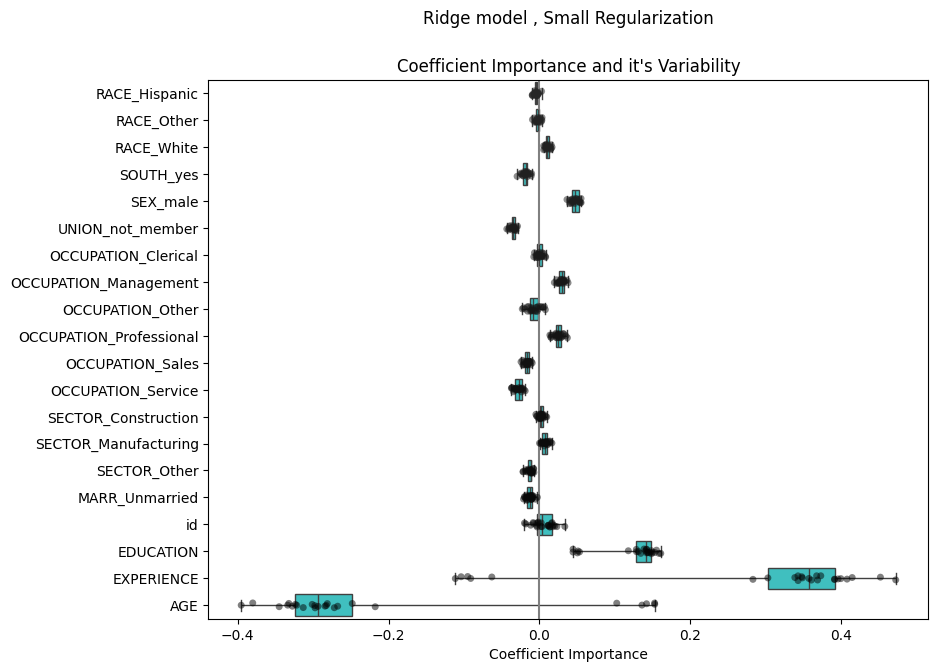

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data = coefs , orient = 'h', palette = 'dark:k',alpha=0.5)
sns.boxplot(data=coefs ,orient = 'h',color = 'cyan', saturation =0.5 , whis = 10)
plt.axvline(x=0 , color = '.5')
plt.xlabel("Coefficient Importance")
plt.title("Coefficient Importance and it's Variability")
plt.suptitle("Ridge model , Small Regularization")
plt.subplots_adjust(left = 0.1)

# The problem of correlated variables

The `AGE and EXPERIENCE` coefficients are affected by strong variability which might be due to the collinearity between the 2 features:
1. as AGE and EXPERIENCE vary together in the data, their effect is difficult to tease apart.

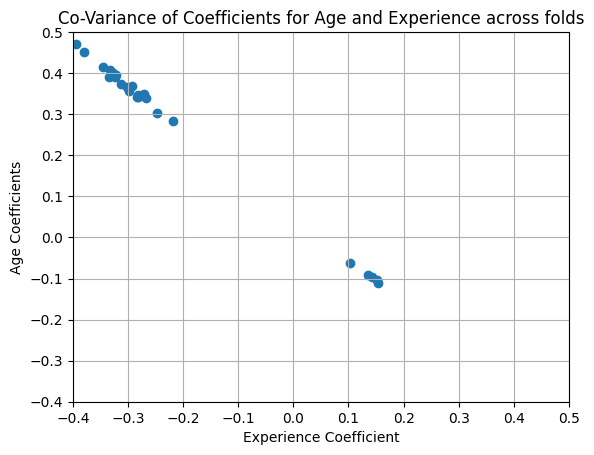

In [ ]:
plt.xlabel('Experience Coefficient')
plt.ylabel("Age Coefficients")
plt.grid(True)
plt.xlim(-0.4 , 0.5)
plt.ylim(-0.4 , 0.5)
plt.scatter(coefs['AGE'],coefs['EXPERIENCE'])
_  =plt.title("Co-Variance of Coefficients for Age and Experience across folds")

When Age coefficient is positive Experience Coefficients is Negative and vice-versa

To go further` we remove one of the 2 features and check what is the impact` on the `model stability`.

In [ ]:
column_to_drop = ['AGE']
cv_model = cross_validate(model , inputs.drop(columns=column_to_drop),
                          target , cv=cv , return_estimator=True,n_jobs=2,)
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(inputs.drop(columns=column_to_drop).iloc[train_idx]).std(axis=0)
        for est , (train_idx , _ ) in zip(cv_model['estimator'], cv.split(inputs,target))
    ],
    columns=feature_names[:-1],
)

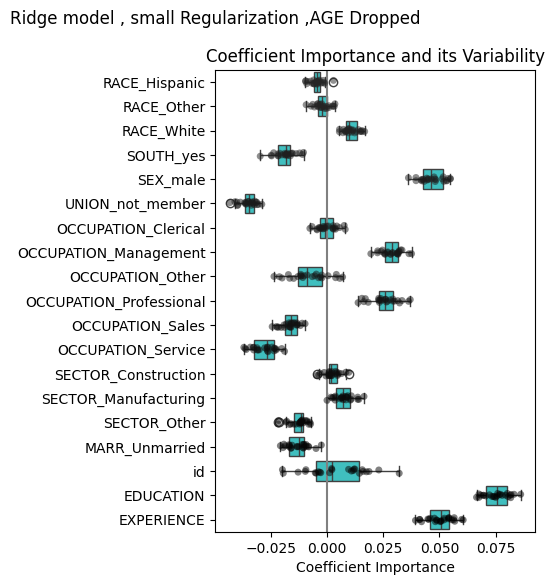

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=coefs , orient='h',palette='dark:k',alpha=0.5)
sns.boxplot(data=coefs ,color='cyan',orient = 'h',saturation=0.5)
plt.axvline(x=0 ,color = '.5')
plt.title('Coefficient Importance and its Variability')
plt.xlabel("Coefficient Importance")
plt.suptitle("Ridge model , small Regularization ,AGE Dropped")
plt.subplots_adjust(left = 0.5)

The estimation of the EXPERIENCE coefficient now shows a much reduced variability. EXPERIENCE remains important for all models trained during cross-validation.

# Preprocessing numerical variables :-

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
preprocesor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),categorical_cols),
    (StandardScaler() , numeric_cols),
)
preprocesor

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['RACE', 'SOUTH', 'SEX', 'UNION', 'OCCUPATION',
                                  'SECTOR', 'MARR']),
                                ('standardscaler', StandardScaler(),
                                 ['EDUCATION', 'EXPERIENCE', 'AGE'])])

Model will stay Unchange

In [ ]:
model = make_pipeline(
    preprocesor ,TransformedTargetRegressor(
        regressor = Ridge(alpha=1e-10) , func = np.log10 , inverse_func=sp.special.exp10
    ),
)
model.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'SOUTH', 'SEX',
                                                   'UNION', 'OCCUPATION',
                                                   'SECTOR', 'MARR']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['EDUCATION', 'EXPERIENCE',
                                                   'AGE'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

# Check performance

Again, we check the performance of the computed model using, for example, the `median absolute error` of the model and the `R squared coefficient`.

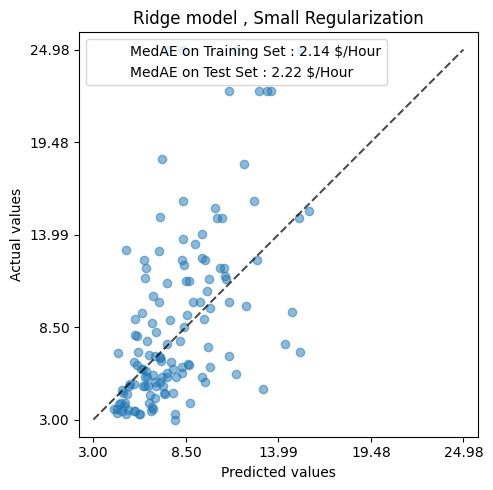

In [ ]:
mae_train = median_absolute_error(Y_train , model.predict(X_train))
Y_pred = model.predict(X_test)
mae_test = median_absolute_error(Y_test , Y_pred)
scores = {
    "MedAE on Training Set ":f"{mae_train:.2f} $/Hour",
    "MedAE on Test Set ": f"{mae_test:.2f} $/Hour",
}

_, ax = plt.subplots(figsize = (5, 5))
display = PredictionErrorDisplay.from_predictions(
    Y_test , Y_pred , kind = 'actual_vs_predicted',ax=ax ,scatter_kwargs={'alpha':0.5}
)
ax.set_title("Ridge model , Small Regularization")
for name, score in scores.items():
  ax.plot([],[]," ",label=f"{name}: {score}")

ax.legend(loc='upper left')
plt.tight_layout()

In [ ]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'SOUTH', 'SEX',
                                                   'UNION', 'OCCUPATION',
                                                   'SECTOR', 'MARR']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['EDUCATION', 'EXPERIENCE',
                                                   'AGE'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

For the coefficient analysis, scaling is not needed this time because it was performed during the preprocessing step.

Text(0.5, 1.0, 'Ridge model ,small Regularization, Normalized variables')

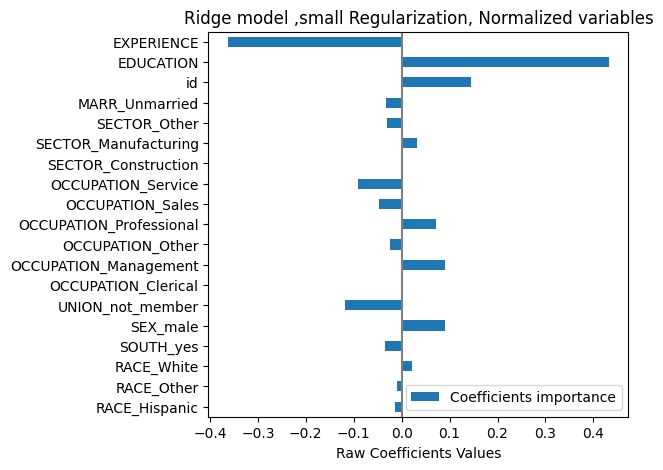

In [ ]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names[:model[-1].regressor_.coef_.shape[0]],
)
coefs.plot.barh(figsize = (7, 5))
plt.axvline(x=0 , color = '.5')
plt.subplots_adjust(left=0.3)
plt.xlabel("Raw Coefficients Values")
plt.title("Ridge model ,small Regularization, Normalized variables")